In [1]:
import zipfile
import os

zip_path_folder = './'

for filename in os.listdir(zip_path_folder):
    if filename.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(zip_path_folder, filename), 'r') as zip_ref:
            zip_ref.extractall(zip_path_folder)
        print(f"Extracted {filename} to {zip_path_folder}")


Extracted 2011_09_26_calib.zip to ./
Extracted 2011_09_26_drive_0001_sync.zip to ./
Extracted 2011_09_26_drive_0001_tracklets.zip to ./
Extracted ddpg_kitti_car.zip to ./


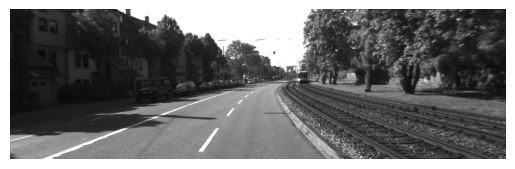

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000000.png')
img.shape
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
plt.imshow(img_rgb)
plt.axis('off')
plt.show() 

In [3]:
import numpy as np

def create_image_dataset(path: str) -> list:
    if not os.path.exists(path):
        raise ValueError(f"Path {path} does not exist.")
    
    image_folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder)) and folder.startswith('image')]
    dataset = {os.path.basename(os.path.normpath(folder)): np.array([cv.imread(os.path.join(f"{folder}/data", image)) for image in os.listdir(f"{folder}/data")]) for folder in image_folders} 
    return dataset

image_dataset = create_image_dataset('./2011_09_26/2011_09_26_drive_0001_sync')

In [4]:
for i, folder in enumerate(image_dataset):
    print(image_dataset[folder].shape)

(108, 375, 1242, 3)
(108, 375, 1242, 3)
(108, 375, 1242, 3)
(108, 375, 1242, 3)


In [5]:
image_dataset = np.concatenate(list(image_dataset.values()), axis=0)

In [6]:
# oxis

txt_path = "./2011_09_26/2011_09_26_drive_0001_sync/oxts/dataformat.txt"
keys = []

with(open(txt_path, 'r') as file):
    lines = file.readlines()
    for line in lines:
        if ":" in line:
            key = line.split(":", 1)[0].strip()
            keys.append(key)
    
keys = np.array(keys)
print(keys)

['lat' 'lon' 'alt' 'roll' 'pitch' 'yaw' 'vn' 've' 'vf' 'vl' 'vu' 'ax' 'ay'
 'ay' 'af' 'al' 'au' 'wx' 'wy' 'wz' 'wf' 'wl' 'wu' 'pos_accuracy'
 'vel_accuracy' 'navstat' 'numsats' 'posmode' 'velmode' 'orimode']


In [7]:
import pandas as pd

oxts_data_path = "./2011_09_26/2011_09_26_drive_0001_sync/oxts/data/"
oxis_timestamps_path = "./2011_09_26/2011_09_26_drive_0001_sync/oxts/timestamps.txt"

oxis_dataset = []
oxis_timestamps = []

for file in os.listdir(oxts_data_path):
    if file.endswith(".txt"):
        with open(os.path.join(oxts_data_path, file), 'r') as f:
            line = f.readline().strip()
            values = list(map(float, line.split()))
            oxis_dataset.append(values)

with open(oxis_timestamps_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        oxis_timestamps.append([line.strip()])
        
assert len(oxis_dataset) == len(oxis_timestamps)

keys = np.append(keys, "timestamp")    
# создаём DataFrame
oxis_dataset = np.concatenate([oxis_dataset, oxis_timestamps], axis=1)
oxis_dataset = pd.DataFrame(oxis_dataset, columns=keys)
oxis_dataset.head()

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wl,wu,pos_accuracy,vel_accuracy,navstat,numsats,posmode,velmode,orimode,timestamp
0,49.015003823272,8.4342971002335,116.43032836914,0.035752,0.00903,-2.6087069803847,-6.811441479104,-11.275641809511,13.172716663769,-0.12475264293164,...,-0.022495299354602,-0.018809330937153,0.027658633371879,0.012727922061358,4.0,11.0,6.0,6.0,6.0,2011-09-26 13:02:25.964389445
1,49.014997147797,8.4342801643975,116.43227386475,0.036453,0.008009,-2.6110049803847,-6.7699157701468,-11.25071862282,13.129879921905,-0.1296124234787,...,-0.012614277251239,-0.021891250950339,0.027658633371879,0.012727922061358,4.0,11.0,6.0,6.0,6.0,2011-09-26 13:02:26.074347616
2,49.014991107977,8.4342648138193,116.43529510498,0.035908,0.006461,-2.6133139803847,-6.7315187822835,-11.221558050195,13.084994068263,-0.1403968162132,...,-0.016039362066511,-0.023275588099693,0.027658633371879,0.012727922061358,4.0,11.0,6.0,6.0,6.0,2011-09-26 13:02:26.174598199
3,49.014985128444,8.4342494910691,116.44071960449,0.035565,0.005031,-2.6159039803847,-6.68493309545,-11.198742882657,13.041455256294,-0.14449702620615,...,-0.013816663306394,-0.024773318553328,0.027658633371879,0.012727922061358,4.0,11.0,6.0,6.0,6.0,2011-09-26 13:02:26.274369566
4,49.01497858597,8.4342326764083,116.44785308838,0.034299,0.00647,-2.6188039803847,-6.6342093744852,-11.175294520933,12.995313202002,-0.14861568956766,...,0.011585957218563,-0.026827028489992,0.027658633371879,0.012727922061358,4.0,11.0,6.0,6.0,6.0,2011-09-26 13:02:26.384417986


In [8]:
# velodin
point_cloud = np.fromfile('./2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000000.bin', dtype=np.float32)
print(point_cloud.shape)
point_cloud = point_cloud.reshape(-1, 4)
print(point_cloud.shape)

(484060,)
(121015, 4)


In [9]:
velodin_data_path = "./2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/"
velodin_timestamps_path = "./2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/timestamps.txt"
velodin_dataset_end_path = "./2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/timestamps_end.txt"
velodin_dataset_start_path = "./2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/timestamps_start.txt"

velodin_dataset = []
velodin_timestamp_dataset = []

keys = ["x", "y", "z", "intensity", "velodin_timestamps", "velodin_dataset_end", "velodin_dataset_start"]

for file in os.listdir(velodin_data_path):
    if file.endswith(".bin"):
        with open(os.path.join(velodin_data_path, file), 'rb') as f:
            point_cloud = np.fromfile(f, dtype=np.float32)
            point_cloud = point_cloud.reshape(-1, 4)
            velodin_dataset.append(point_cloud)

            
with open(velodin_timestamps_path, 'r') as f_ts, \
     open(velodin_dataset_start_path, 'r') as f_start, \
     open(velodin_dataset_end_path, 'r') as f_end:

    for ts_line in f_ts:
        start_line = f_start.readline()
        end_line = f_end.readline()
        velodin_timestamp_dataset.append([
            ts_line.strip(),
            start_line.strip(),
            end_line.strip()
        ])

# velodin_dataset = pd.DataFrame(velodin_dataset, columns=keys)
# velodin_dataset.head()

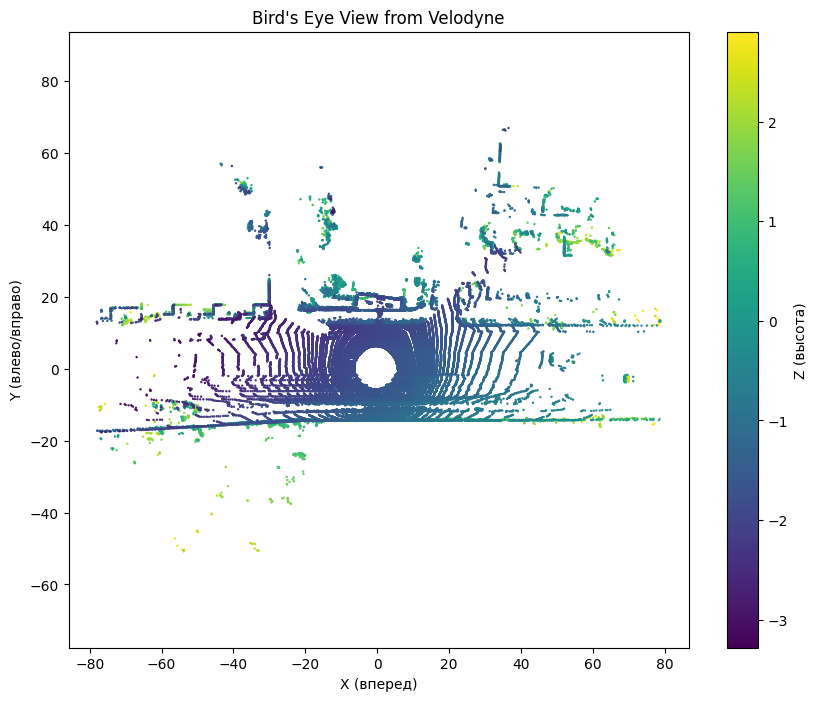

In [10]:
# example without transformation to cam coords
def plot_bev(points, title="Bird's Eye View"):
    plt.figure(figsize=(10, 8))
    plt.scatter(points[:, 0], points[:, 1], s=0.5, c=points[:, 2], cmap='viridis')
    plt.title(title)
    plt.xlabel('X (вперед)')
    plt.ylabel('Y (влево/вправо)')
    plt.axis('equal')
    plt.colorbar(label='Z (высота)')
    plt.show()
    
plot_bev(point_cloud, title="Bird's Eye View from Velodyne")

In [11]:
import xml.etree.ElementTree as ET
import os
import pandas as pd

def parse_tracklet_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    all_data = []

    for item in root.findall(".//item"):
        obj_type_elem = item.find("objectType")
        if obj_type_elem is None:
            continue

        obj_type = obj_type_elem.text
        h = float(item.find("h").text)
        w = float(item.find("w").text)
        l = float(item.find("l").text)
        first_frame = int(item.find("first_frame").text)

        poses_elem = item.find("poses")
        if poses_elem is not None:
            for pose_item in poses_elem.findall("item"):
                tx = float(pose_item.find("tx").text)
                ty = float(pose_item.find("ty").text)
                tz = float(pose_item.find("tz").text)
                rx = float(pose_item.find("rx").text)
                ry = float(pose_item.find("ry").text)
                rz = float(pose_item.find("rz").text)
                state = int(pose_item.find("state").text)
                occlusion = int(pose_item.find("occlusion").text)
                truncation = int(pose_item.find("truncation").text)

                all_data.append({
                    "objectType": obj_type,
                    "h": h, "w": w, "l": l,
                    "first_frame": first_frame,
                    "tx": tx, "ty": ty, "tz": tz,
                    "rx": rx, "ry": ry, "rz": rz,
                    "state": state,
                    "occlusion": occlusion,
                    "truncation": truncation
                })

    return all_data

def load_tracklet_dataset(path: str) -> list:
    file_path = os.path.join(path, 'tracklet_labels.xml')
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No tracklet_labels.xml found in {path}")
    return parse_tracklet_xml(file_path)

tracklets = load_tracklet_dataset('./2011_09_26/2011_09_26_drive_0001_sync')
print(len(tracklets))
tracklets_df = pd.DataFrame(tracklets)
tracklets_df.head()

572


,objectType,h,w,l,first_frame,tx,ty,tz,rx,ry,rz,state,occlusion,truncation
0,Car,2.167235,1.705712,4.329356,0,25.212516,8.603392,-1.792157,0.0,0.0,-3.184200,2,0,0
1,Car,2.167235,1.705712,4.329356,0,23.865835,8.638552,-1.827676,0.0,0.0,-3.184200,1,0,0
2,Car,2.167235,1.705712,4.329356,0,22.475106,8.675590,-1.863800,0.0,0.0,-3.184200,2,0,0
3,Car,2.167235,1.705712,4.329356,0,21.109089,8.720640,-1.865978,0.0,0.0,-3.182645,1,0,0
4,Car,2.167235,1.705712,4.329356,0,19.743072,8.765690,-1.868156,0.0,0.0,-3.181090,1,0,0


In [12]:
import numpy as np
import cv2


def parse_calib_file(calib_path):
    calib_data = {}

    with open(calib_path, 'r') as f:
        for line in f:
            if not line.strip() or ':' not in line:
                continue

            key_value = line.strip().split(':', 1)
            key = key_value[0].strip()
            value = key_value[1].strip()

            if key.startswith(('S_', 'K_', 'D_', 'R_', 'T_', 'S_rect_', 'R_rect_', 'P_rect_')):
                try:
                    values = np.array([float(x) for x in value.split()], dtype=np.float32)

                    # Только K, R, R_rect — матрицы 3x3
                    if key.startswith(('K_', 'R_', 'R_rect_')):
                        matrix = values.reshape(3, 3)
                    elif key.startswith('P_rect_'):
                        matrix = values.reshape(3, 4)
                    elif key.startswith('T_'):
                        matrix = values.reshape(3, 1)
                    else:
                        # D_, S_, S_rect_ — остаются как одномерные массивы
                        matrix = values

                    calib_data[key] = matrix
                except Exception as e:
                    print(f"Error parsing {key}: {e}")
                    calib_data[key] = value
            else:
                calib_data[key] = value

    return calib_data




def parse_calib_imu_to_velo(calib_path):
    """
    Парсит файл calib_imu_to_velo.txt и возвращает матрицу преобразования.
    
    :param calib_path: путь к файлу calib_imu_to_velo.txt
    :return: словарь с:
        - 'R' — матрица поворота (3x3)
        - 'T' — вектор сдвига (3x1)
        - 'Tr' — полная матрица преобразования 4x4 [R | T; 0 0 0 1]
    """
    calib_data = {}

    with open(calib_path, 'r') as f:
        for line in f:
            if not line.strip() or ':' not in line:
                continue

            key_value = line.strip().split(':', 1)
            key = key_value[0].strip()
            value = key_value[1].strip()

            # Обработка R и T
            if key == 'R':
                R = np.array([float(x) for x in value.split()], dtype=np.float32).reshape(3, 3)
                calib_data['R'] = R
            elif key == 'T':
                T = np.array([float(x) for x in value.split()], dtype=np.float32).reshape(3, 1)
                calib_data['T'] = T

            else:
                calib_data[key] = value

    # Создаем полную матрицу преобразования 4x4
    if 'R' in calib_data and 'T' in calib_data:
        Tr = np.hstack([calib_data['R'], calib_data['T']])
        Tr = np.vstack([Tr, [0, 0, 0, 1]])
        calib_data['Tr'] = Tr

    return calib_data

def parse_calib_velo_to_cam(calib_path):
    """
    Парсит файл calib_velo_to_cam.txt и возвращает параметры преобразования.

    :param calib_path: путь к файлу calib_velo_to_cam.txt
    :return: словарь с:
        - 'R' — матрица поворота (3x3)
        - 'T' — вектор сдвига (3x1)
        - 'Tr' — полная матрица преобразования 4x4 [R | T; 0 0 0 1]
        - 'delta_f' — коррекция фокусного расстояния
        - 'delta_c' — коррекция центра изображения
    """
    calib_data = {}

    with open(calib_path, 'r') as f:
        for line in f:
            if not line.strip() or ':' not in line:
                continue

            key_value = line.strip().split(':', 1)
            key = key_value[0].strip()
            value = key_value[1].strip()

            if key == 'R':
                R = np.array([float(x) for x in value.split()], dtype=np.float32).reshape(3, 3)
                calib_data['R'] = R
            elif key == 'T':
                T = np.array([float(x) for x in value.split()], dtype=np.float32).reshape(3, 1)
                calib_data['T'] = T
            elif key == 'delta_f':
                delta_f = np.array([float(x) for x in value.split()], dtype=np.float32)
                calib_data['delta_f'] = delta_f
            elif key == 'delta_c':
                delta_c = np.array([float(x) for x in value.split()], dtype=np.float32)
                calib_data['delta_c'] = delta_c
            else:
                calib_data[key] = value

    # Строим полную матрицу преобразования Tr
    if 'R' in calib_data and 'T' in calib_data:
        Tr = np.hstack([calib_data['R'], calib_data['T']])
        Tr = np.vstack([Tr, [0, 0, 0, 1]])
        calib_data['Tr'] = Tr

    return calib_data

In [13]:
def undistort_image(img, cam_id, calib_data):
    """
    Удаляет дисторсию с изображения камеры cam_id (например, '00', '01' и т.д.)
    :param img: исходное изображение (np.ndarray)
    :param cam_id: ID камеры (str), например '00'
    :param calib_data: результат parse_calib_file
    :return: изображение без дисторсии
    """

    K_key = f'K_{cam_id}'
    D_key = f'D_{cam_id}'

    if K_key not in calib_data or D_key not in calib_data:
        raise ValueError(f"Калибровочные данные для камеры {cam_id} не найдены")

    K = calib_data[K_key]
    D = calib_data[D_key]

    h, w = img.shape[:2]

    # Получить новую матрицу камеры и ROI
    new_K = cv2.getOptimalNewCameraMatrix(K, D, (w, h), 1, (w, h))[0]

    # Удалить дисторсию
    undistorted_img = cv2.undistort(img, K, D, None, new_K)

    return undistorted_img



calib_path = './2011_09_26/calib_cam_to_cam.txt'  # замените на свой путь
img_path = './2011_09_26/2011_09_26_drive_0001_sync/image_00/data/0000000000.png'      # замените на ваше изображение

calib_data = parse_calib_file(calib_path)
# print(calib_data)

# # Вывести интринсик и дисторсию для камеры 00
# print("K_00:\n", calib_data['K_00'])
# print("D_00:", calib_data['D_00'])

img = cv2.imread(img_path)
undistorted_img = undistort_image(img, '00', calib_data)

# cv2.imwrite("undistorted_image.png", undistorted_img)
# cv2.imshow("Undistorted", undistorted_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Transform data

In [14]:
calib_velo_path = './2011_09_26/calib_velo_to_cam.txt'
velo_calib_data = parse_calib_velo_to_cam(calib_velo_path)
Tr_velo_to_cam = velo_calib_data['Tr'] 



def velo_to_cam(points_velo, Tr):
    """
    :return точки лидара в координатах камеры
    """
    points_homogeneous = np.hstack([points_velo, np.ones((points_velo.shape[0], 1))])
    points_cam = (Tr @ points_homogeneous.T).T
    return points_cam[:, :3]

# print(calib_data)

In [15]:
import gym
from gym import spaces
import numpy as np
import cv2
from typing import Dict, Any


def project_to_image(points_cam, P_rect):
    points_homogeneous = np.hstack([points_cam, np.ones((points_cam.shape[0], 1))])
    points_2d_homogeneous = (P_rect @ points_homogeneous.T).T
    points_2d = points_2d_homogeneous[:, :2] / points_2d_homogeneous[:, 2, None]
    return points_2d


class KITTICarEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, image_dataset, velodin_dataset, oxis_dataset, tracklets_df, Tr_velo_to_cam, P_rect):
        super(KITTICarEnv, self).__init__()

        # Пространство действий: руль (-1..1), газ (0..1), тормоз (0..1)
        self.action_space = spaces.Box(
            low=np.array([-1.0, 0.0, 0.0]),
            high=np.array([1.0, 1.0, 1.0]),
            dtype=np.float32
        )

        # Пространство состояний: RGB изображение + вектор (скорость, угол поворота, расстояние до объектов)
        self.image_shape = (84, 84, 3)  # после resize
        self.vector_dim = 6  # vf, yaw, tx, ty, tz, distance to nearest object

        self.observation_space = spaces.Dict({
            "image": spaces.Box(low=0, high=255, shape=self.image_shape, dtype=np.uint8),
            "vector": spaces.Box(low=-np.inf, high=np.inf, shape=(self.vector_dim,), dtype=np.float32)
        })

        # Данные
        self.image_dataset = image_dataset
        self.velodin_dataset = velodin_dataset
        self.oxis_dataset = oxis_dataset
        self.tracklets_df = tracklets_df
        self.Tr_velo_to_cam = Tr_velo_to_cam
        self.P_rect = P_rect

        # Проверка длины данных
        self.min_length = min(
            len(image_dataset),
            len(velodin_dataset),
            len(oxis_dataset),
            len(tracklets_df)
        )
        print(f"[INFO] Environment initialized with dataset length: {self.min_length}")

        self.current_idx = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_idx = 0
        return self._get_obs(), {}  # SB3 v2+ требует info dict

    def _get_obs(self):
        img = self.image_dataset[self.current_idx]
        img_resized = cv2.resize(img, self.image_shape[:2])
        img_normalized = img_resized  # можно нормализовать: / 255.0

        try:
            row = self.oxis_dataset.iloc[self.current_idx]
            speed = float(row['vf'])
            yaw_rate = float(row['yaw'])
        except IndexError:
            speed = 0.0
            yaw_rate = 0.0

        try:
            obj = self.tracklets_df.iloc[self.current_idx]
            tx, ty, tz = float(obj['tx']), float(obj['ty']), float(obj['tz'])
            dist = np.sqrt(tx ** 2 + ty ** 2 + tz ** 2)
        except Exception:
            tx, ty, tz = 0.0, 0.0, 0.0
            dist = 100.0

        vector_state = np.array([
            speed,
            yaw_rate,
            tx, ty, tz,
            dist
        ], dtype=np.float32)

        return {
            'image': img_normalized,
            'vector': vector_state
        }

    def step(self, action):
        terminated = self.current_idx >= self.min_length - 1
        truncated = False
        self.current_idx += 1

        reward = self.calculate_reward(action)

        if terminated:
            self.current_idx = 0

        return self._get_obs(), reward, terminated, truncated, {}

    def calculate_reward(self, action):
        reward = 0.1  # базовая награда за выживание

        # Получаем текущие данные с защитой от выхода за границы
        try:
            row = self.oxis_dataset.iloc[self.current_idx]
            speed = float(row['vf'])
            yaw_rate = float(row['yaw'])
        except IndexError:
            speed = 0.0
            yaw_rate = 0.0

        # Штраф за резкий руль
        if abs(action[0]) > 0.7:
            reward -= 0.05 * abs(action[0])

        if 10 < speed < 40:
            reward += 0.05
        elif speed > 40:
            reward -= 0.01 

        try:
            obj = self.tracklets_df.iloc[self.current_idx]
            dist = np.sqrt(obj['tx'] ** 2 + obj['ty'] ** 2 + obj['tz'] ** 2)
            if dist < 5:
                reward -= 10
        except Exception:
            pass

        if abs(yaw_rate) > 0.5:
            reward -= 0.02 * abs(yaw_rate)

        return reward

    def render(self, mode='human'):
        try:
            img = self.image_dataset[self.current_idx]
            points_velo = self.velodin_dataset[self.current_idx][:, :3]
        except IndexError:
            print("[WARNING] Cannot render: index out of bounds.")
            
            return

        try:
            points_cam = velo_to_cam(points_velo, self.Tr_velo_to_cam)
            points_2d = project_to_image(points_cam, self.P_rect)

            for pt in points_2d:
                u, v = int(pt[0]), int(pt[1])
                if 0 <= u < img.shape[1] and 0 <= v < img.shape[0]:
                    cv2.circle(img, (u, v), 1, (0, 255, 0), -1)

            cv2.imshow("KITTI View", img)
            cv2.waitKey(1)
        except Exception as e:
            print(f"[ERROR] Rendering failed: {e}")

In [16]:
from stable_baselines3 import DDPG
from stable_baselines3.common.callbacks import EvalCallback

env = KITTICarEnv(image_dataset, velodin_dataset, oxis_dataset, tracklets_df, Tr_velo_to_cam, calib_data['P_rect_00'])


# Callback для оценки
# eval_callback = EvalCallback(env, eval_freq=1000)

# model = DDPG("CnnPolicy", env, verbose=1, buffer_size=100000, batch_size=64, gamma=0.95)

# model.learn(total_timesteps=1000, callback=eval_callback)


[INFO] Environment initialized with dataset length: 108


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [17]:

from stable_baselines3.common.torch_layers import CombinedExtractor
from stable_baselines3 import SAC
import torch as th
import torch.nn as nn


class CustomCombinedExtractor(CombinedExtractor):
    def __init__(self, observation_space: gym.Space):
        super().__init__(observation_space)

        self.extractors = th.nn.ModuleDict()

        # CNN для изображения
        self.extractors["image"] = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(3136, 512),
            nn.ReLU()
        )

        # MLP для вектора
        self.extractors["vector"] = nn.Sequential(
            nn.Linear(observation_space['vector'].shape[0], 64),
            nn.ReLU()
        )

        # Общая размерность
        self._features_dim = 512 + 64

    def forward(self, observations) -> th.Tensor:
        encoded_tensor_list = []

        for key, extractor in self.extractors.items():
            encoded_tensor_list.append(extractor(observations[key]))

        return th.cat(encoded_tensor_list, dim=1)
        
policy_kwargs = dict(
    features_extractor_class=CustomCombinedExtractor,
    features_extractor_kwargs=dict(),
)
model = SAC("MultiInputPolicy", env, policy_kwargs=policy_kwargs, verbose=1, batch_size=64, buffer_size=10000)
# model = DDPG("MultiInputPolicy", env, policy_kwargs=policy_kwargs, verbose=1, batch_size=64, buffer_size=10000)
model.learn(total_timesteps=1000)
# model.save("ddpg_kitti_car")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 108      |
|    ep_rew_mean     | 6.46     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 40       |
|    time_elapsed    | 10       |
|    total_timesteps | 432      |
| train/             |          |
|    actor_loss      | -5.62    |
|    critic_loss     | 0.0547   |
|    ent_coef        | 0.905    |
|    ent_coef_loss   | -0.504   |
|    learning_rate   | 0.0003   |
|    n_updates       | 331      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 108      |
|    ep_rew_mean     | 6.42     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 36       |
|    time_elapsed    | 23       |
|    total_timesteps | 864      |
| train/             |          |
|    actor_loss      | -8.15    |
|    critic_loss     | 0.0559   |
|    ent_coef 

In [18]:
obs, _ = env.reset()  # распакуй только obs

for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    
    if terminated or truncated:
        obs, _ = env.reset()

KeyboardInterrupt: 

In [24]:
import os
import numpy as np
import cv2
import gym
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize, sync_envs_normalization

def test_trained_model(model_path: str = "sac_kitti_car",
                       norm_path: str = "vec_normalize.pkl",
                       video_output: str = None,
                       num_steps: int = 1000,
                       render: bool = True,
                       verbose: bool = True):
    """
    Тестирует обученную модель на среде KITTICarEnv с масштабированием до Full HD и отображением красного текста.
    """

    print("[INFO] Загрузка среды и модели...")

    # Создай среду (замените на ваш код загрузки env)
    env = KITTICarEnv(image_dataset, velodin_dataset, oxis_dataset, tracklets_df, Tr_velo_to_cam, calib_data['P_rect_00'])  # замените ... на аргументы
    env = DummyVecEnv([lambda: env])

    if os.path.exists(norm_path):
        print(f"[INFO] Загрузка VecNormalize из {norm_path}")
        env = VecNormalize.load(norm_path, env)
        env.norm_reward = False
        env.training = False

    print(f"[INFO] Загрузка модели из {model_path}")
    model = SAC.load(model_path)

    obs = env.reset()

    total_reward = 0
    step_count = 0

    # Для записи видео
    video_writer = None
    full_hd_size = (1920, 1080)  # Full HD
    if video_output:
        video_writer = cv2.VideoWriter(video_output,
                                       cv2.VideoWriter_fourcc(*'XVID'),
                                       10,
                                       full_hd_size)

    print(f"[INFO] Начало тестирования — {num_steps} шагов")
    for step in range(num_steps):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)

        total_reward += reward[0]
        step_count += 1

        if verbose:
            vector_state = obs['vector'][0] if isinstance(obs, dict) else obs
            print(f"Step {step+1}: Action={action}, Vector State={vector_state}, Reward={reward[0]:.2f}")

        if render:
            img = obs['image'][0].copy()
            lidar_points = obs.get('lidar', None)

            # Конвертируем изображение в uint8, если оно нормализовано
            img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            # Масштабируем изображение до Full HD
            img_full_hd = cv2.resize(img, full_hd_size, interpolation=cv2.INTER_LINEAR)

            # Отображение действий (например, [steering, throttle])
            steering, throttle = float(action[0][0]), float(action[0][1])
            text_action = f"Steering: {steering:.2f}, Throttle: {throttle:.2f}"

            font_scale = 0.7     # Размер шрифта для Full HD
            thickness = 2        # Толщина текста
            color = (0, 0, 255)  # Красный цвет

            # Позиция текста
            pos = (30, 60)  # X, Y

            # Добавляем фон под текст
            text_size, _ = cv2.getTextSize(text_action, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
            text_w, text_h = text_size
            cv2.rectangle(img_full_hd, (pos[0], pos[1] - text_h - 10), (pos[0] + text_w + 10, pos[1] + 10),
                          (0, 0, 0), -1)

            # Рисуем текст
            cv2.putText(img_full_hd, text_action, (pos[0] + 5, pos[1] - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness, cv2.LINE_AA)

            # Отрисовка LiDAR-точек, если они есть
            if lidar_points is not None:
                # Предположим, что точки уже спроецированы на камеру (x, y) в пикселях
                lidar_xy = lidar_points[:, :2]

                # Пересчитаем координаты под Full HD
                h_orig, w_orig = img.shape[:2]
                h_new, w_new = full_hd_size[1], full_hd_size[0]
                scale_x = w_new / w_orig
                scale_y = h_new / h_orig

                for x, y in lidar_xy:
                    if 0 <= x < w_orig and 0 <= y < h_orig:
                        x_new = int(x * scale_x)
                        y_new = int(y * scale_y)
                        cv2.circle(img_full_hd, (x_new, y_new), 2, (0, 0, 255), -1)

            # Показываем кадр
            cv2.imshow("KITTI Car Env (Full HD)", img_full_hd)

            if video_writer is not None:
                video_writer.write(img_full_hd)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        if done:
            print(f"[INFO] Эпизод завершён на шаге {step+1}. Общая награда: {total_reward:.2f}")
            obs = env.reset()
            total_reward = 0

    if video_writer:
        video_writer.release()
        print(f"[INFO] Видео сохранено в {video_output}")

    cv2.destroyAllWindows()
    print("[SUCCESS] Тестирование модели завершено.")

if isinstance(env, VecNormalize):
    print("[INFO] Среда нормализована — применяем VecNormalize")
    sync_envs_normalization(env, model.get_env())

# Запуск тестирования
test_trained_model(
    model_path="ddpg_kitti_car",
    norm_path="vec_normalize.pkl",
    video_output="test_episode_fullhd.avi",
    num_steps=1000,
    render=True,
    verbose=True,
)

[INFO] Загрузка среды и модели...
[INFO] Environment initialized with dataset length: 108
[INFO] Загрузка модели из ddpg_kitti_car
[INFO] Начало тестирования — 1000 шагов
Step 1: Action=[[0.02623761 0.49062818 0.49864528]], Vector State=[13.12988   -2.611005  23.865835   8.638552  -1.8276764 25.446867 ], Reward=0.10
Step 2: Action=[[0.02591336 0.49057433 0.49832556]], Vector State=[13.084994  -2.613314  22.475105   8.6755905 -1.8637996 24.163403 ], Reward=0.10
Step 3: Action=[[0.02547693 0.4906012  0.4979453 ]], Vector State=[13.041455  -2.615904  21.109089   8.72064   -1.8659776 22.915607 ], Reward=0.10
Step 4: Action=[[0.02475023 0.49045134 0.49762988]], Vector State=[12.995314  -2.618804  19.743073   8.76569   -1.8681557 21.682163 ], Reward=0.10
Step 5: Action=[[0.02418697 0.4903617  0.49739227]], Vector State=[12.944547  -2.621677  18.377054   8.8107395 -1.8703338 20.465664 ], Reward=0.10
Step 6: Action=[[0.02341723 0.4904451  0.49720615]], Vector State=[12.87889   -2.624715  17.01